<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.080331,99.402459,66.286824,64.289181,-1168.428806,-883.370011,82.084404,-965.454415
1,0.0,1.0,72.528089,95.922729,64.716495,71.085518,742.626508,1056.879338,15.560497,1041.318842
2,0.0,2.0,98.912302,73.797959,60.145561,59.379538,266.037021,568.272382,-85.822824,654.095205
3,0.0,3.0,89.630081,44.895999,40.178007,35.576880,-195.749575,24.531392,-53.688261,78.219653
4,0.0,4.0,91.415813,20.542344,30.812666,53.930094,50.588047,257.288965,136.321737,120.967227
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.904366,26.043542,24.708628,68.759546,-101.389347,89.026735,67.277729,21.749006
59996,999.0,56.0,84.022228,54.071100,52.035057,31.208967,-33.219251,198.118101,225.501561,-27.383460
59997,999.0,57.0,44.660093,58.010544,67.799626,89.724229,-150.640333,119.554159,197.891192,-78.337033
59998,999.0,58.0,78.713332,67.562953,75.437879,39.227896,305.277170,576.219230,301.667702,274.551528


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.080331,99.402459,66.286824,64.289181,-1168.428806,-883.370011,82.084404,-965.454415
1,0.0,1.0,72.528089,95.922729,64.716495,71.085518,742.626508,1056.879338,15.560497,1041.318842
2,0.0,2.0,98.912302,73.797959,60.145561,59.379538,266.037021,568.272382,-85.822824,654.095205
3,0.0,3.0,89.630081,44.895999,40.178007,35.576880,-195.749575,24.531392,-53.688261,78.219653
4,0.0,4.0,91.415813,20.542344,30.812666,53.930094,50.588047,257.288965,136.321737,120.967227
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.904366,26.043542,24.708628,68.759546,-101.389347,89.026735,67.277729,21.749006
59996,999.0,56.0,84.022228,54.071100,52.035057,31.208967,-33.219251,198.118101,225.501561,-27.383460
59997,999.0,57.0,44.660093,58.010544,67.799626,89.724229,-150.640333,119.554159,197.891192,-78.337033
59998,999.0,58.0,78.713332,67.562953,75.437879,39.227896,305.277170,576.219230,301.667702,274.551528


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.080331,99.402459,66.286824,64.289181,-1168.428806,-883.370011,82.084404,-965.454415
1,0.0,1.0,72.528089,95.922729,64.716495,71.085518,742.626508,1056.879338,15.560497,1041.318842
2,0.0,2.0,98.912302,73.797959,60.145561,59.379538,266.037021,568.272382,-85.822824,654.095205
3,0.0,3.0,89.630081,44.895999,40.178007,35.576880,-195.749575,24.531392,-53.688261,78.219653
4,0.0,4.0,91.415813,20.542344,30.812666,53.930094,50.588047,257.288965,136.321737,120.967227
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.904366,26.043542,24.708628,68.759546,-101.389347,89.026735,67.277729,21.749006
59996,999.0,56.0,84.022228,54.071100,52.035057,31.208967,-33.219251,198.118101,225.501561,-27.383460
59997,999.0,57.0,44.660093,58.010544,67.799626,89.724229,-150.640333,119.554159,197.891192,-78.337033
59998,999.0,58.0,78.713332,67.562953,75.437879,39.227896,305.277170,576.219230,301.667702,274.551528


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    45.080331  99.402459  66.286824  64.289181 -1168.428806   
      1.0    72.528089  95.922729  64.716495  71.085518   742.626508   
      2.0    98.912302  73.797959  60.145561  59.379538   266.037021   
      3.0    89.630081  44.895999  40.178007  35.576880  -195.749575   
      4.0    91.415813  20.542344  30.812666  53.930094    50.588047   
...                ...        ...        ...        ...          ...   
999.0 55.0   60.904366  26.043542  24.708628  68.759546  -101.389347   
      56.0   84.022228  54.071100  52.035057  31.208967   -33.219251   
      57.0   44.660093  58.010544  67.799626  89.724229  -150.640333   
      58.0   78.713332  67.562953  75.437879  39.227896   305.277170   
      59.0   34.875786  91.657229  98.427742  53.471675   563.558406   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -883.370011   82.084404  -965.454415  
      1.0    1056.879338   15.560497  1041.318842  
      2.0     568.272382  -85.822824   654.095205  
      3.0      24.531392  -53.688261    78.219653  
      4.0     257.288965  136.321737   120.967227  
...                  ...         ...          ...  
999.0 55.0     89.026735   67.277729    21.749006  
      56.0    198.118101  225.501561   -27.383460  
      57.0    119.554159  197.891192   -78.337033  
      58.0    576.219230  301.667702   274.551528  
      59.0    851.990837  247.264366   604.726471  

[60000 rows x 8 columns]

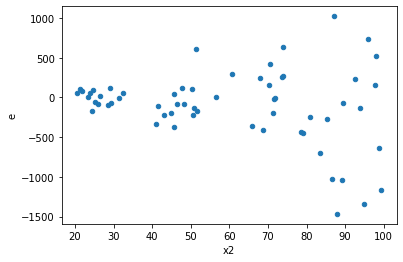

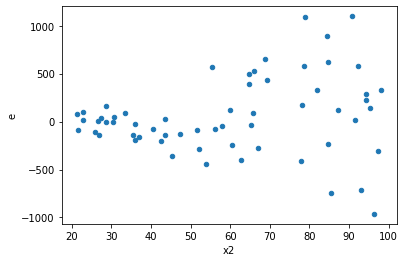

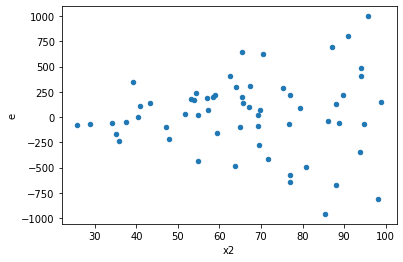

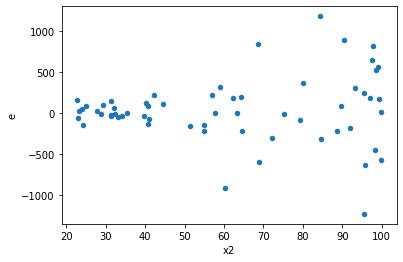

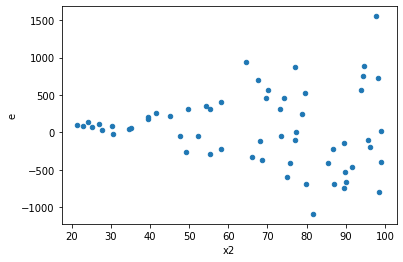

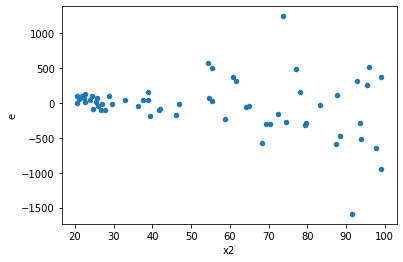

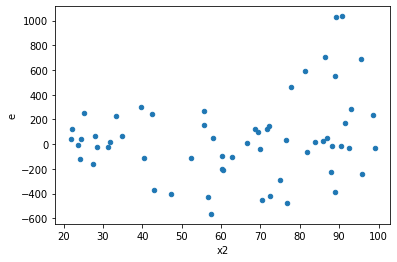

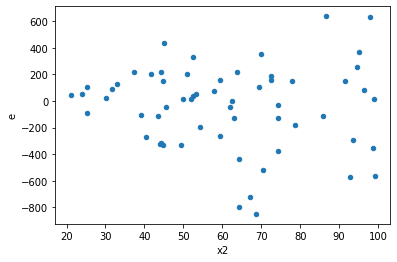

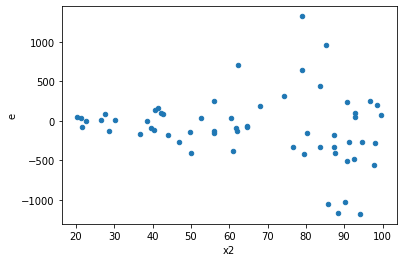

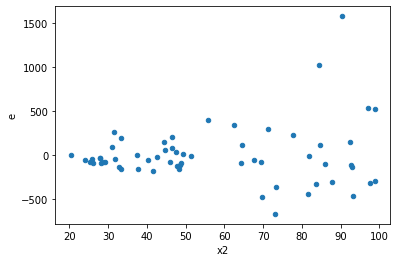

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,313350.0457286813,7606705.403743172,15667.502286434066,380335.2701871586,24.275424584841286,1.2491743195397476e-09,0.9999999993754128,6.245871597698738e-10,Reject005=0 : Heteroscedasticity
1.0,20.0,20.0,230224.70117291532,5237154.373322984,11511.235058645765,261857.71866614922,22.748012470605858,2.280183819536319e-09,0.9999999988599081,1.1400919097681594e-09,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,560540.1275273769,4612015.156632132,28027.006376368845,230600.7578316066,8.227805522106676,1.62871662909847e-05,0.9999918564168545,8.14358314549235e-06,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,154310.89834257355,6067610.724205869,7715.544917128677,303380.5362102935,39.32068822991129,1.3251177932716018e-11,0.9999999999933744,6.625588966358009e-12,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,1248023.2542224014,8367770.619294364,62401.16271112007,418388.5309647182,6.704819474303804,8.140830837621849e-05,0.9999592958458119,4.070415418810924e-05,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,134540.92742142754,5507969.536881463,6727.046371071377,275398.47684407316,40.93898891917584,9.012124380092246e-12,0.9999999999954939,4.506062190046123e-12,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,1087867.095670373,3706916.8433891507,54393.35478351865,185345.84216945752,3.407508930219871,0.008537148854129484,0.9957314255729353,0.004268574427064742,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,940555.0085093619,3136510.378979577,47027.7504254681,156825.51894897886,3.334744220809024,0.00970395733931717,0.9951480213303414,0.004851978669658585,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,410993.9881975217,5220208.09478986,20549.699409876084,261010.40473949298,12.701422027324286,4.278304621685436e-07,0.9999997860847689,2.139152310842718e-07,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,313350.0457286813,7606705.403743172,15667.502286434066,380335.2701871586,24.275424584841286,1.2491743195397476e-09,Reject005=0 : Heteroscedasticity
1.0,20.0,20.0,230224.70117291532,5237154.373322984,11511.235058645765,261857.71866614922,22.748012470605858,2.280183819536319e-09,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,560540.1275273769,4612015.156632132,28027.006376368845,230600.7578316066,8.227805522106676,1.62871662909847e-05,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,154310.89834257355,6067610.724205869,7715.544917128677,303380.5362102935,39.32068822991129,1.3251177932716018e-11,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,1248023.2542224014,8367770.619294364,62401.16271112007,418388.5309647182,6.704819474303804,8.140830837621849e-05,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,134540.92742142754,5507969.536881463,6727.046371071377,275398.47684407316,40.93898891917584,9.012124380092246e-12,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,1087867.095670373,3706916.8433891507,54393.35478351865,185345.84216945752,3.407508930219871,0.008537148854129484,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,940555.0085093619,3136510.378979577,47027.7504254681,156825.51894897886,3.334744220809024,0.00970395733931717,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,410993.9881975217,5220208.09478986,20549.699409876084,261010.40473949298,12.701422027324286,4.278304621685436e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    993
Reject005=1 : Homoscedasticity        7
Name: Result_test, dtype: int64